### **1. Import Dataset**


In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [93]:
# Load the dataset
emails_df = pd.read_csv('datasets/Phishing_Email.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
emails_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [94]:
# Check for missing values
emails_df.isnull().sum()

# Display basic statistics
emails_df.describe()

# Display the distribution of labels
emails_df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [95]:
# Drop rows with missing values
emails_df = emails_df.dropna()

# Remove duplicate rows
emails_df = emails_df.drop_duplicates()

# Verify the changes
emails_df.isnull().sum()
emails_df.duplicated().sum()

0

In [96]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18634 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18634 non-null  object
dtypes: int64(1), object(2)
memory usage: 582.3+ KB


In [97]:
a = emails_df['Email Type'].unique()
print(sorted(a))

['Phishing Email', 'Safe Email']


### **2. Data Preprocessing**

In [98]:
# Drop the unnamed column
emails_df = emails_df.drop(columns=['Unnamed: 0'])


In [99]:
# Replace 'Safe Email' with 0 and 'Phishing Email' with 1
emails_df['Email Type'] = emails_df['Email Type'].replace({'Safe Email': 0, 'Phishing Email': 1})

/var/folders/zg/35ghknm958b4ltq43qlvw2dh0000gn/T/ipykernel_29770/891312354.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emails_df['Email Type'] = emails_df['Email Type'].replace({'Safe Email': 0, 'Phishing Email': 1})


In [100]:
# Rename the column from 'Email Type' to 'isPhishing'
emails_df = emails_df.rename(columns={'Email Type': 'isPhishing'})

In [101]:
# Display the first 10 rows to confirm the column has been dropped
emails_df.head(10)

,Email Text,isPhishing
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1
5,global risk management operations sally congra...,0
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",0
7,"entourage , stockmogul newsletter ralph velez ...",1
8,"we owe you lots of money dear applicant , afte...",1
9,re : coastal deal - with exxon participation u...,0


In [102]:
print(emails_df.shape)

(18634, 2)


isPhishing
0    11322
1     7312
Name: count, dtype: int64


<Axes: xlabel='isPhishing', ylabel='count'>

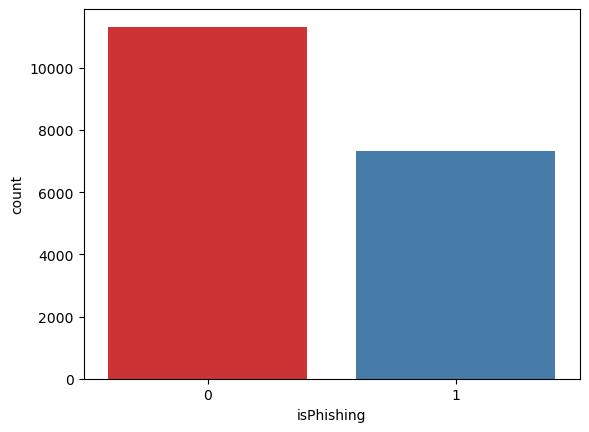

In [121]:
# Check the distribution of labels
print(emails_df['isPhishing'].value_counts())

sns.countplot(x = 'isPhishing', data = emails_df, palette = 'Set1')

### **3. Balancing Data**

In [122]:
# Separate the classes
phishing_emails = emails_df[emails_df['isPhishing'] == 1]
legitimate_emails = emails_df[emails_df['isPhishing'] == 0]

# Downsample the majority class
legitimate_emails_downsampled = legitimate_emails.sample(len(phishing_emails), random_state=42)

# Combine the balanced datasets
balanced_emails_df = pd.concat([phishing_emails, legitimate_emails_downsampled])

isPhishing
1    7312
0    7312
Name: count, dtype: int64


<Axes: xlabel='isPhishing', ylabel='count'>

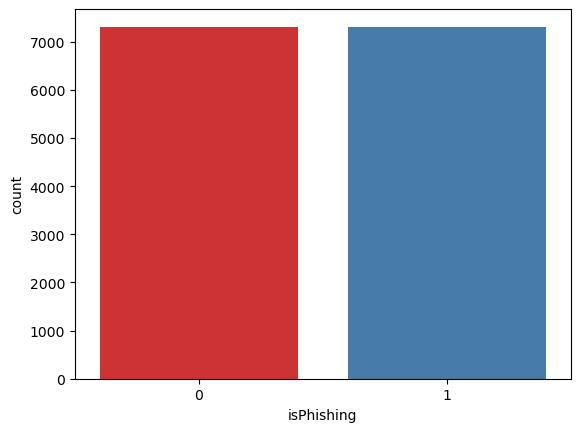

In [123]:
# Check the distribution of labels
print(balanced_emails_df['isPhishing'].value_counts())

sns.countplot(x = 'isPhishing', data = balanced_emails_df, palette = 'Set1')

### **4. Text Preprocessing**
#### Tokenization: Splitting the email text into individual tokens (words or subwords).
#### Stop-word Removal: Removing common words that do not contribute to the phishing detection.
#### Lemmatization/Stemming: Reducing words to their base or root form.

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [150]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Apply the text preprocessing function to the correct column
balanced_emails_df['processed_text'] = balanced_emails_df['Email Text'].apply(preprocess_text)  # Replace 'Email Text' with the correct column name

In [148]:
pd.reset_option('display.max_colwidth')

In [151]:
# Display the first few processed texts
balanced_emails_df.head()

,Email Text,isPhishing,processed_text
3,\nHello I am your hot lil horny toy.\n I am...,1,"hello hot lil horny toy . one dream , open min..."
4,software at incredibly low prices ( 86 % lower...,1,software incredibly low price ( 86 % lower ) ....
7,"entourage , stockmogul newsletter ralph velez ...",1,"entourage , stockmogul newsletter ralph velez ..."
8,"we owe you lots of money dear applicant , afte...",1,"owe lot money dear applicant , review upon rec..."
10,make her beg you to give it to her everynight ...,1,make beg give everynight please partner much b...


In [152]:
# Drop the original 'Email Text' column and rename 'processed_text' to 'Email Text'
balanced_emails_df = balanced_emails_df.drop(columns=['Email Text'])
balanced_emails_df = balanced_emails_df.rename(columns={'processed_text': 'Email Text'})

In [155]:
cols = balanced_emails_df.columns.tolist()
cols

['isPhishing', 'Email Text']

In [156]:
cols = cols[-1:] + cols[:-1]
cols

['Email Text', 'isPhishing']

In [157]:
balanced_emails_df=balanced_emails_df[cols]


In [164]:
# Verify the changes
balanced_emails_df.head()

,Email Text,isPhishing
3,"hello hot lil horny toy . one dream , open min...",1
4,software incredibly low price ( 86 % lower ) ....,1
7,"entourage , stockmogul newsletter ralph velez ...",1
8,"owe lot money dear applicant , review upon rec...",1
10,make beg give everynight please partner much b...,1


### **5. Convert the DataFrame to JSON format**

In [165]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(balanced_emails_df, test_size=0.2, random_state=42)

# Verify the splits
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(validation_df)}')

Training set size: 11699
Validation set size: 2925


In [166]:
# Define a function to create the JSONL structure for each email
def create_jsonl_entry(email_text, is_phishing):
    return {
        "messages": [
            {"role": "system", "content": "Detect if this email is a phishing attempt."},
            {"role": "user", "content": email_text},
            {"role": "assistant", "content": "Phishing" if is_phishing else "Not Phishing"}
        ]
    }

# Apply the function to each row in the training DataFrame
train_jsonl_entries = train_df.apply(lambda row: create_jsonl_entry(row['Email Text'], row['isPhishing']), axis=1)

# Convert the entries to a list of dictionaries for the training set
train_jsonl_list = train_jsonl_entries.tolist()

# Apply the function to each row in the validation DataFrame
validation_jsonl_entries = validation_df.apply(lambda row: create_jsonl_entry(row['Email Text'], row['isPhishing']), axis=1)

# Convert the entries to a list of dictionaries for the validation set
validation_jsonl_list = validation_jsonl_entries.tolist()

In [167]:
# Write the training set to a JSONL file
with open('train_emails_dataset.jsonl', 'w') as f:
    for entry in train_jsonl_list:
        f.write(json.dumps(entry) + "\n")

# Write the validation set to a JSONL file
with open('validation_emails_dataset.jsonl', 'w') as f:
    for entry in validation_jsonl_list:
        f.write(json.dumps(entry) + "\n")